## Car Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data Visualization
- Data preparation
- Model building and evaluation
- Residual Analysis
- Making Prediction
- Model Evaluation


###  Data Understanding and Exploration

Let's first import the required libraries and understand the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Exploration

- Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
- pressure) or through turbocharging (pressurised oxygen intake)


In [6]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

- Symboling: -2 (least risky) to +3 most risky
- Most cars are 0,1,2


In [7]:
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

-Drivewheel: frontwheel, rarewheel or four-wheel drive 


In [8]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

#  Data Cleaning

- checking null values

In [9]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

-- so we have no null values in the dataframe

- `car_ID` isn't of any use to building a linear regression model. Hence, we are dropping it.

In [10]:
# Dropping car_ID 
cars = cars.drop(['car_ID'], axis=1)
cars.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

- To perform linear regression, the target variable should be linearly related to at least one another numeric variable. 


- We'll first subset the list of all numeric variables, and then make a pairwise plot.

In [11]:
# All numeric (float and int) variables in the dataset

In [12]:
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

In [13]:
cars_numeric.shape

(205, 15)

# Data Visualization

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


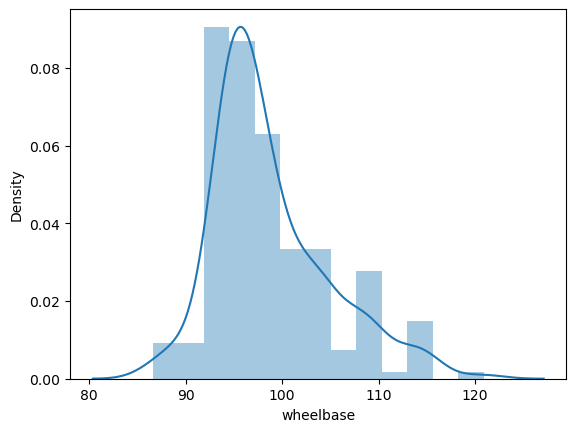

In [14]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


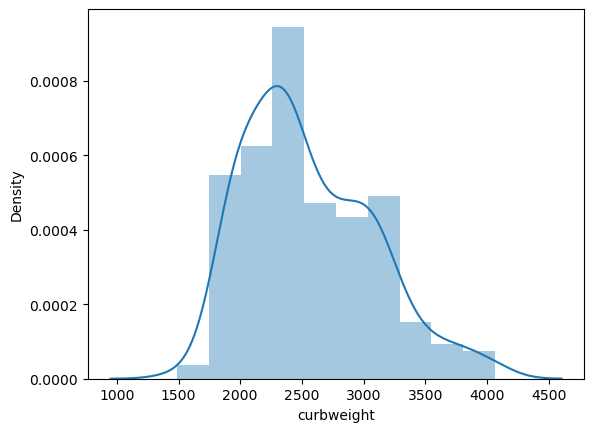

In [15]:
# Curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


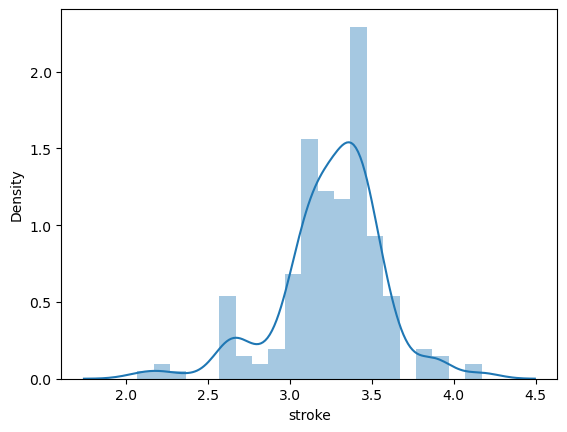

In [16]:
# Stroke: volume of the engine
sns.distplot(cars['stroke'])
plt.show()

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


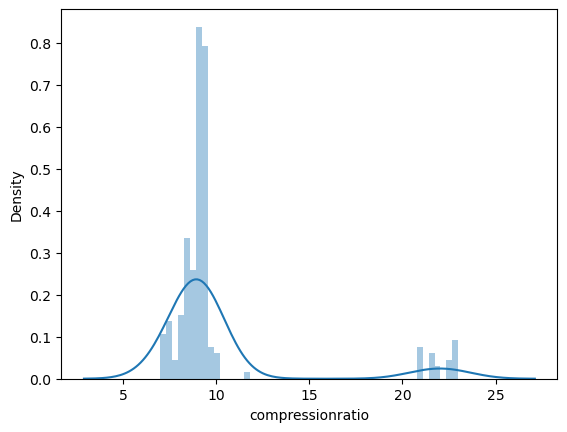

In [17]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


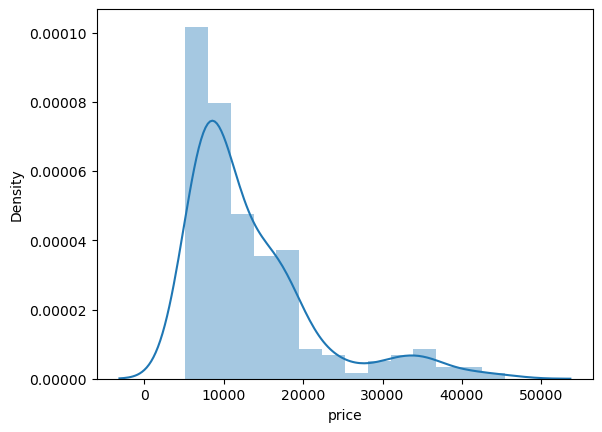

In [18]:
# Target variable: price of car
sns.distplot(cars['price'])
plt.show()

- now look at the pairwise scatter plot 

<Figure size 2000x1000 with 0 Axes>

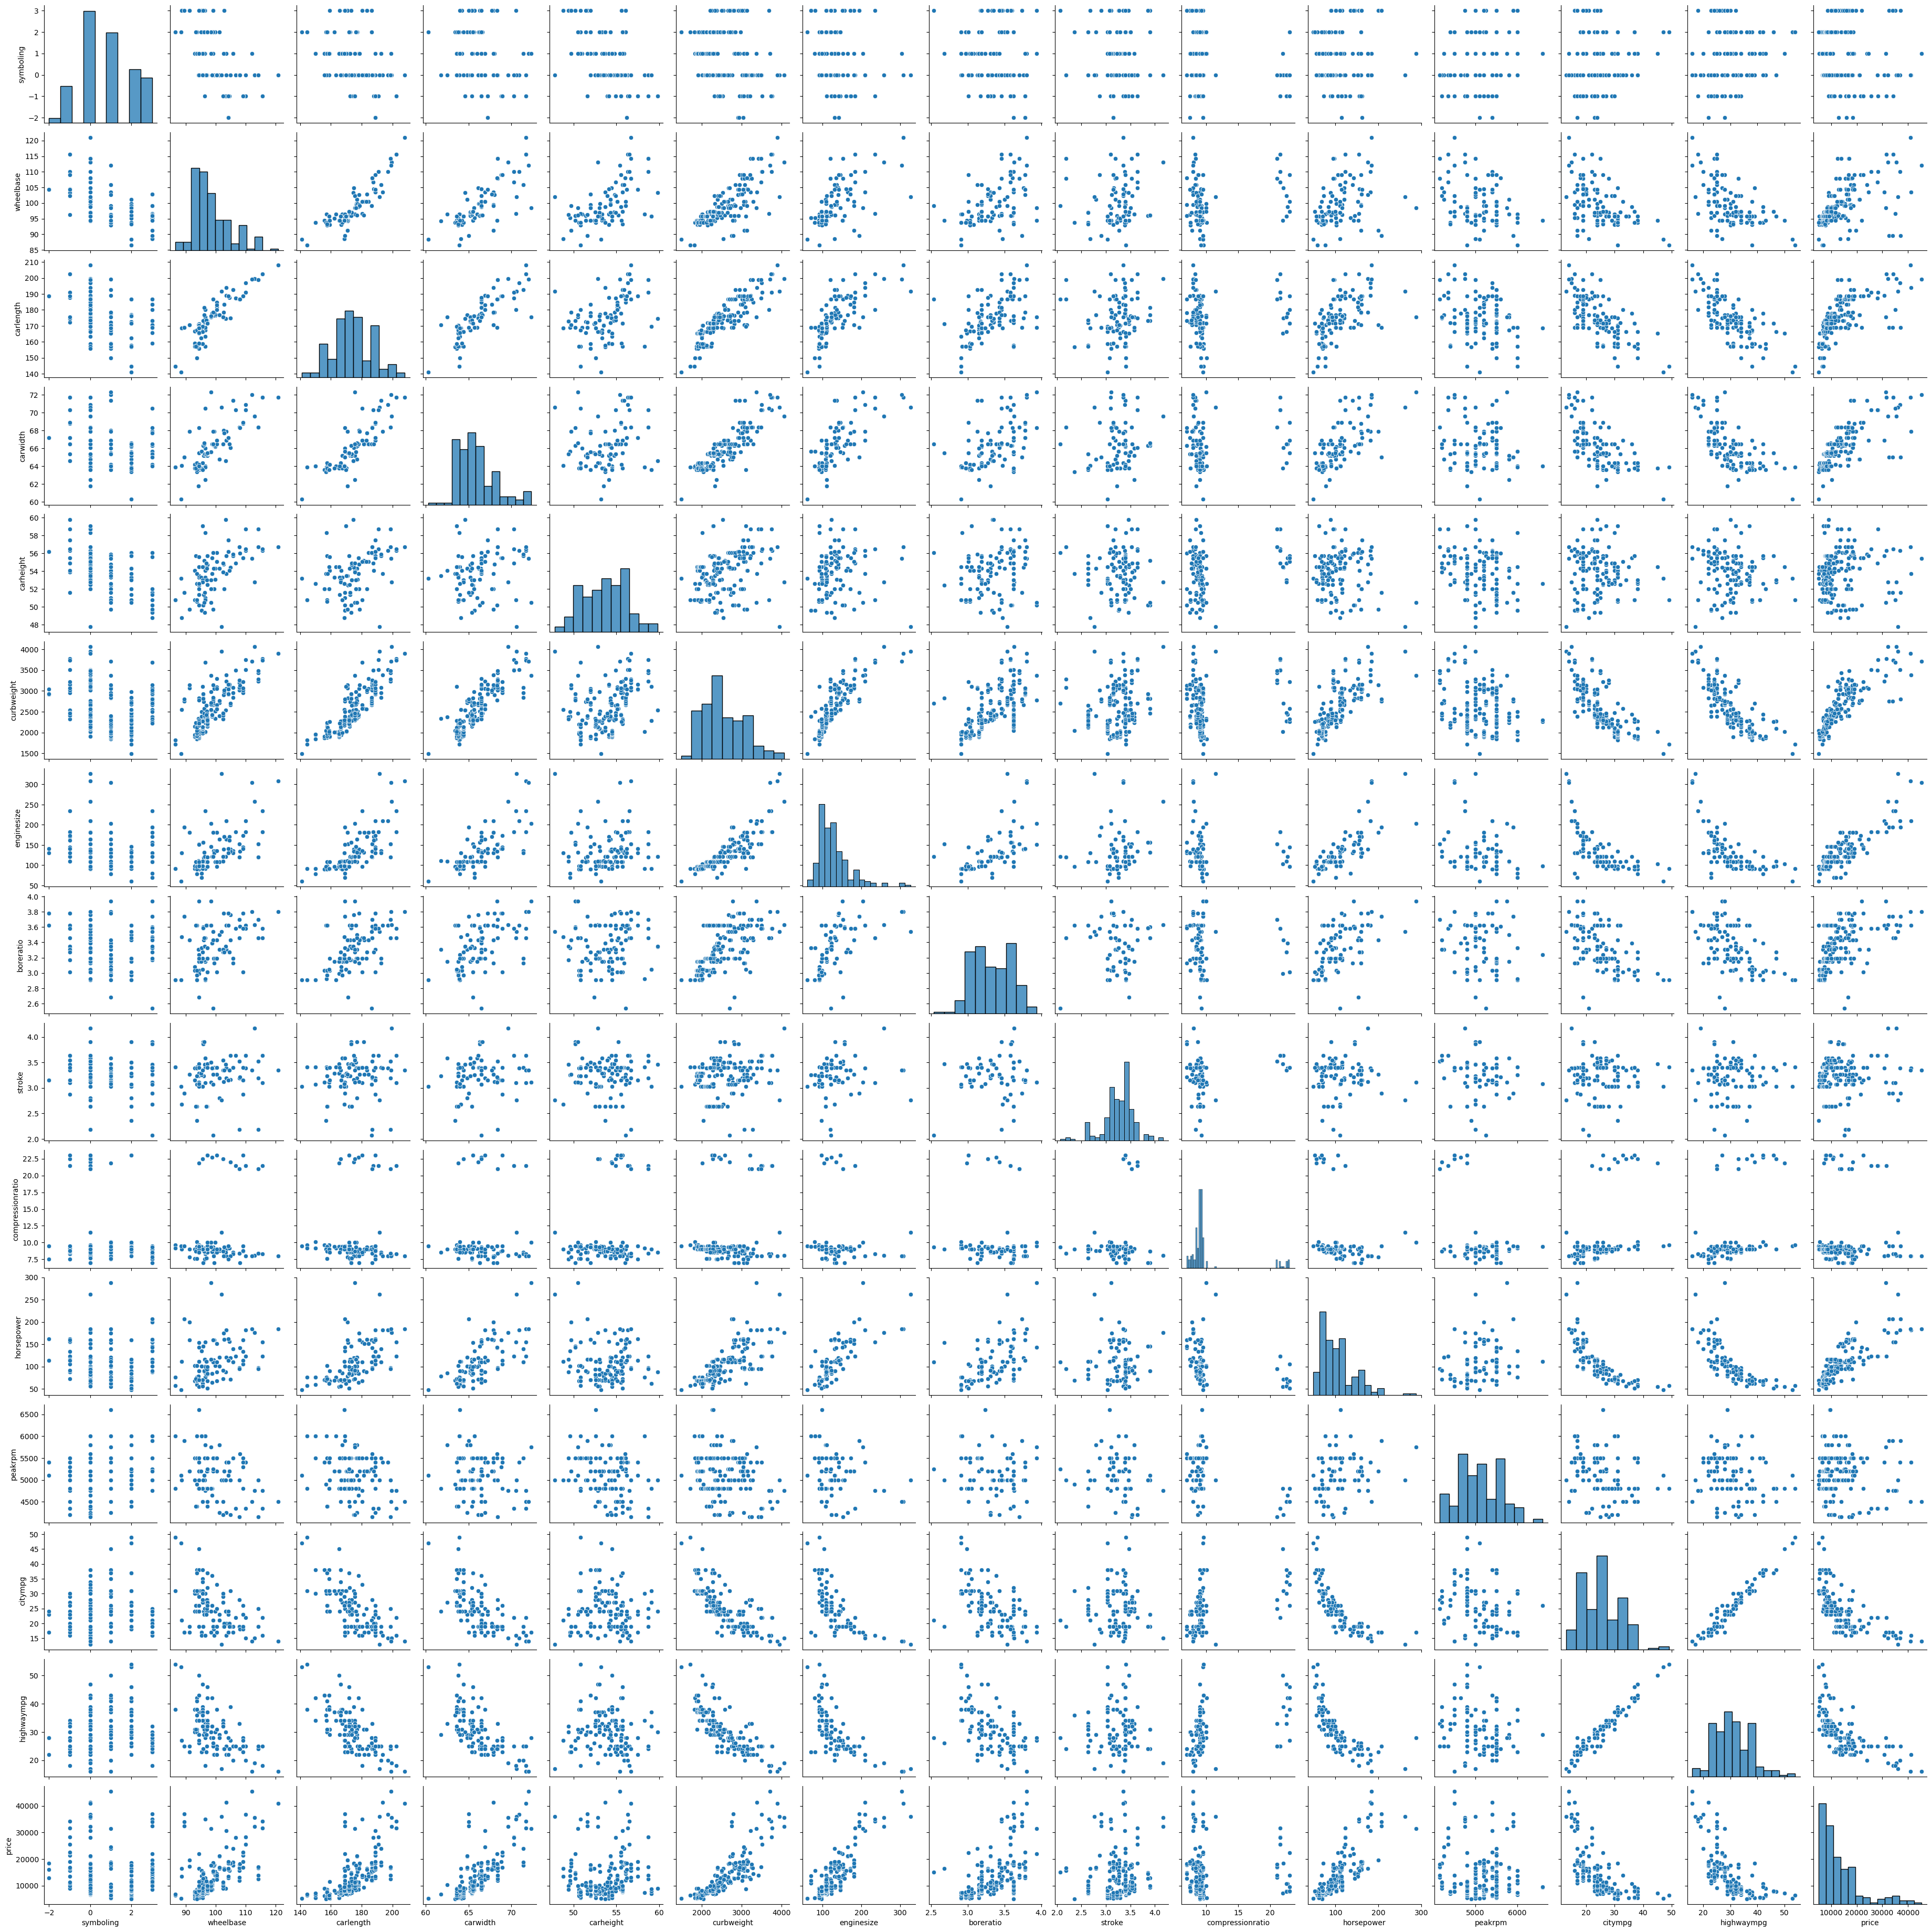

In [19]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

- It's hard to read so now let's plot the correaltion heatmap

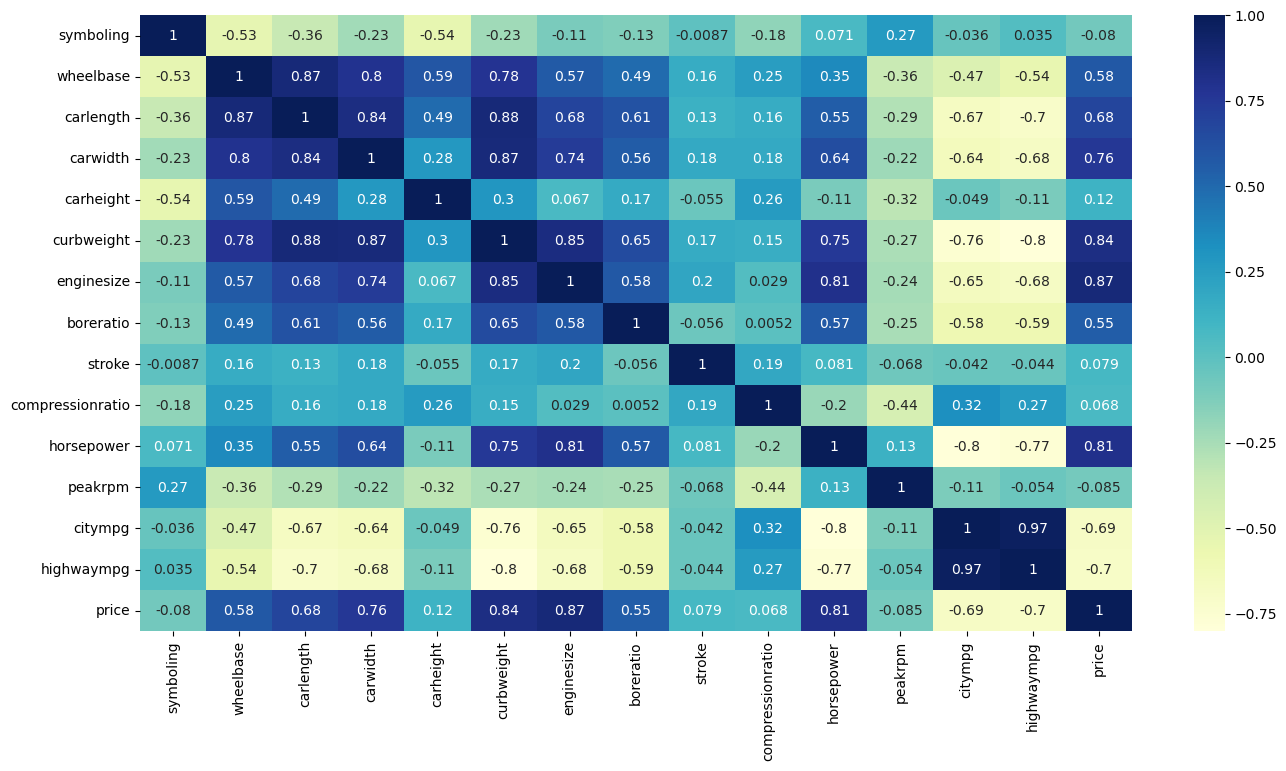

In [145]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cars_numeric.corr(),cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

- Price is negatively correlated to citympg and highwaympg.

Correlation among independent variables:
- Many independent variables are highly correlated: wheelbase, carlength, curbweight, enginesize etc, are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [140]:
# Extracting

-Now, we need to extract the company name from the column CarName. 

In [20]:
print(cars['CarName'].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

- we need the car name what occurs before a space, e.g. alfa-romero, audi,etc.

In [21]:
# Extracting carname

# Method: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [22]:
# creating a new column
cars['car_company'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

In [23]:
cars['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

- Notice that some car-company names are misspelled- vw and vokswagen should be volkswagen, porcshce should be porsche, etc.

- let's solve it.

In [24]:
# Replacing the misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [25]:
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [26]:
# Drop carname variable
cars = cars.drop('CarName', axis=1)

# Data Preaparation

In [27]:
cars.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68              9.0         111    5000       21          27  13495.0   
1   2.68              9.0         111    5000       21          27  16500.0   
2   3.47              9.0         154    5000       19          26  16500.0   
3   3.40             10.0         102    5500       24          30  13950.0   
4   3.40              8.0         115    5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

- Notice that two of the variables - doornumber and cylindernumber are numeric types with the numbers written as words. Let's map these to actual numbers to avoid too many dummy variable creations.


In [28]:
cars['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [29]:
cars['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [30]:
# A function to map the categorical levels to actual numbers.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

#Applying the function 
cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(num_map)

In [31]:
cars.head()    # as we can see it applied well

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0          3      gas        std           2  convertible        rwd   
1          3      gas        std           2  convertible        rwd   
2          1      gas        std           2    hatchback        rwd   
3          2      gas        std           4        sedan        fwd   
4          2      gas        std           4        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke  compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68               9.0         111    5000       21          27  13495.0   
1   2.68               9.0         111    5000       21          27  16500.0   
2   3.47               9.0         154    5000       19          26  16500.0   
3   3.40              10.0         102    5500       24          30  13950.0   
4   3.40               8.0         115    5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

- Let's now create dummy variables for the categorical variables

In [32]:
# Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

fueltype aspiration      carbody drivewheel enginelocation enginetype  \
0      gas        std  convertible        rwd          front       dohc   
1      gas        std  convertible        rwd          front       dohc   
2      gas        std    hatchback        rwd          front       ohcv   
3      gas        std        sedan        fwd          front        ohc   
4      gas        std        sedan        4wd          front        ohc   

  fuelsystem  car_company  
0       mpfi  alfa-romero  
1       mpfi  alfa-romero  
2       mpfi  alfa-romero  
3       mpfi         audi  
4       mpfi         audi

In [33]:
# Convert into dummies through the built-in function i.e. get dummies 
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

fueltype_gas  aspiration_turbo  carbody_hardtop  carbody_hatchback  \
0             1                 0                0                  0   
1             1                 0                0                  0   
2             1                 0                0                  1   
3             1                 0                0                  0   
4             1                 0                0                  0   

   carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  \
0              0              0               0               1   
1              0              0               0               1   
2              0              0               0               1   
3              1              0               1               0   
4              1              0               0               0   

   enginelocation_rear  enginetype_dohcv  ...  car_company_nissan  \
0                    0                 0  ...                   0   
1                    0                 0  ...                   0   
2                    0                 0  ...                   0   
3                    0                 0  ...                   0   
4                    0                 0  ...                   0   

   car_company_peugeot  car_company_plymouth  car_company_porsche  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   car_company_renault  car_company_saab  car_company_subaru  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   car_company_toyota  car_company_volkswagen  car_company_volvo  
0                   0                       0                  0  
1                   0                       0                  0  
2                   0                       0                  0  
3                   0                       0                  0  
4                   0                       0                  0  

[5 rows x 43 columns]

In [34]:
# Drop categorical variable columns
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [35]:
# Concatenate dummy variables with X
cars = pd.concat([cars, cars_dummies], axis=1)

In [36]:
cars.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  ...  car_company_nissan  \
0        2548               4         130       3.47  ...                   0   
1        2548               4         130       3.47  ...                   0   
2        2823               6         152       2.68  ...                   0   
3        2337               4         109       3.19  ...                   0   
4        2824               5         136       3.19  ...                   0   

   car_company_peugeot  car_company_plymouth  car_company_porsche  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   car_company_renault  car_company_saab  car_company_subaru  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   car_company_toyota  car_company_volkswagen  car_company_volvo  
0                   0                       0                  0  
1                   0                       0                  0  
2                   0                       0                  0  
3                   0                       0                  0  
4                   0                       0                  0  

[5 rows x 60 columns]

# Model Building and Evaluation

- Test - Train split and rescalling the features

In [37]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

### Scalling

Now that we have done the test-train split, we need to scale the variables for better interpretability. As it is important when we are doing multiple linear regression,But we only need the scale the numeric columns and not the dummy variables.Also, the scaling has to be done only on the train dataset

There are two methods of scalling:
- Min-Max scalling (normalisation)

- Standardisation (mean - 0 , sigma - 1)

In [38]:
cars_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

- we will use the min-max scalling method because it take care of the outliers as well.

In [39]:
# Import the minmax scaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

In [40]:
#  creating a list of numeric values

num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Fit on data using 'fit_transform'
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122        0.6         1.0   0.244828   0.426016  0.291667   0.265487   
125        1.0         0.0   0.272414   0.452033  0.666667   0.212389   
166        0.6         0.0   0.272414   0.448780  0.308333   0.424779   
1          1.0         0.0   0.068966   0.450407  0.316667   0.088496   
199        0.2         1.0   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio  ...  \
122    0.272692             0.2    0.139623   0.230159  ...   
125    0.500388             0.2    0.339623   1.000000  ...   
166    0.314973             0.2    0.139623   0.444444  ...   
1      0.411171             0.2    0.260377   0.626984  ...   
199    0.647401             0.2    0.260377   0.746032  ...   

     car_company_nissan  car_company_peugeot  car_company_plymouth  \
122                   0                    0                     1   
125                   0                    0                     0   
166                   0                    0                     0   
1                     0                    0                     0   
199                   0                    0                     0   

     car_company_porsche  car_company_renault  car_company_saab  \
122                    0                    0                 0   
125                    1                    0                 0   
166                    0                    0                 0   
1                      0                    0                 0   
199                    0                    0                 0   

     car_company_subaru  car_company_toyota  car_company_volkswagen  \
122                   0                   0                       0   
125                   0                   0                       0   
166                   0                   1                       0   
1                     0                   0                       0   
199                   0                   0                       0   

     car_company_volvo  
122                  0  
125                  0  
166                  0  
1                    0  
199                  1  

[5 rows x 60 columns]

-As expected, the variables have been appropriately scaled.

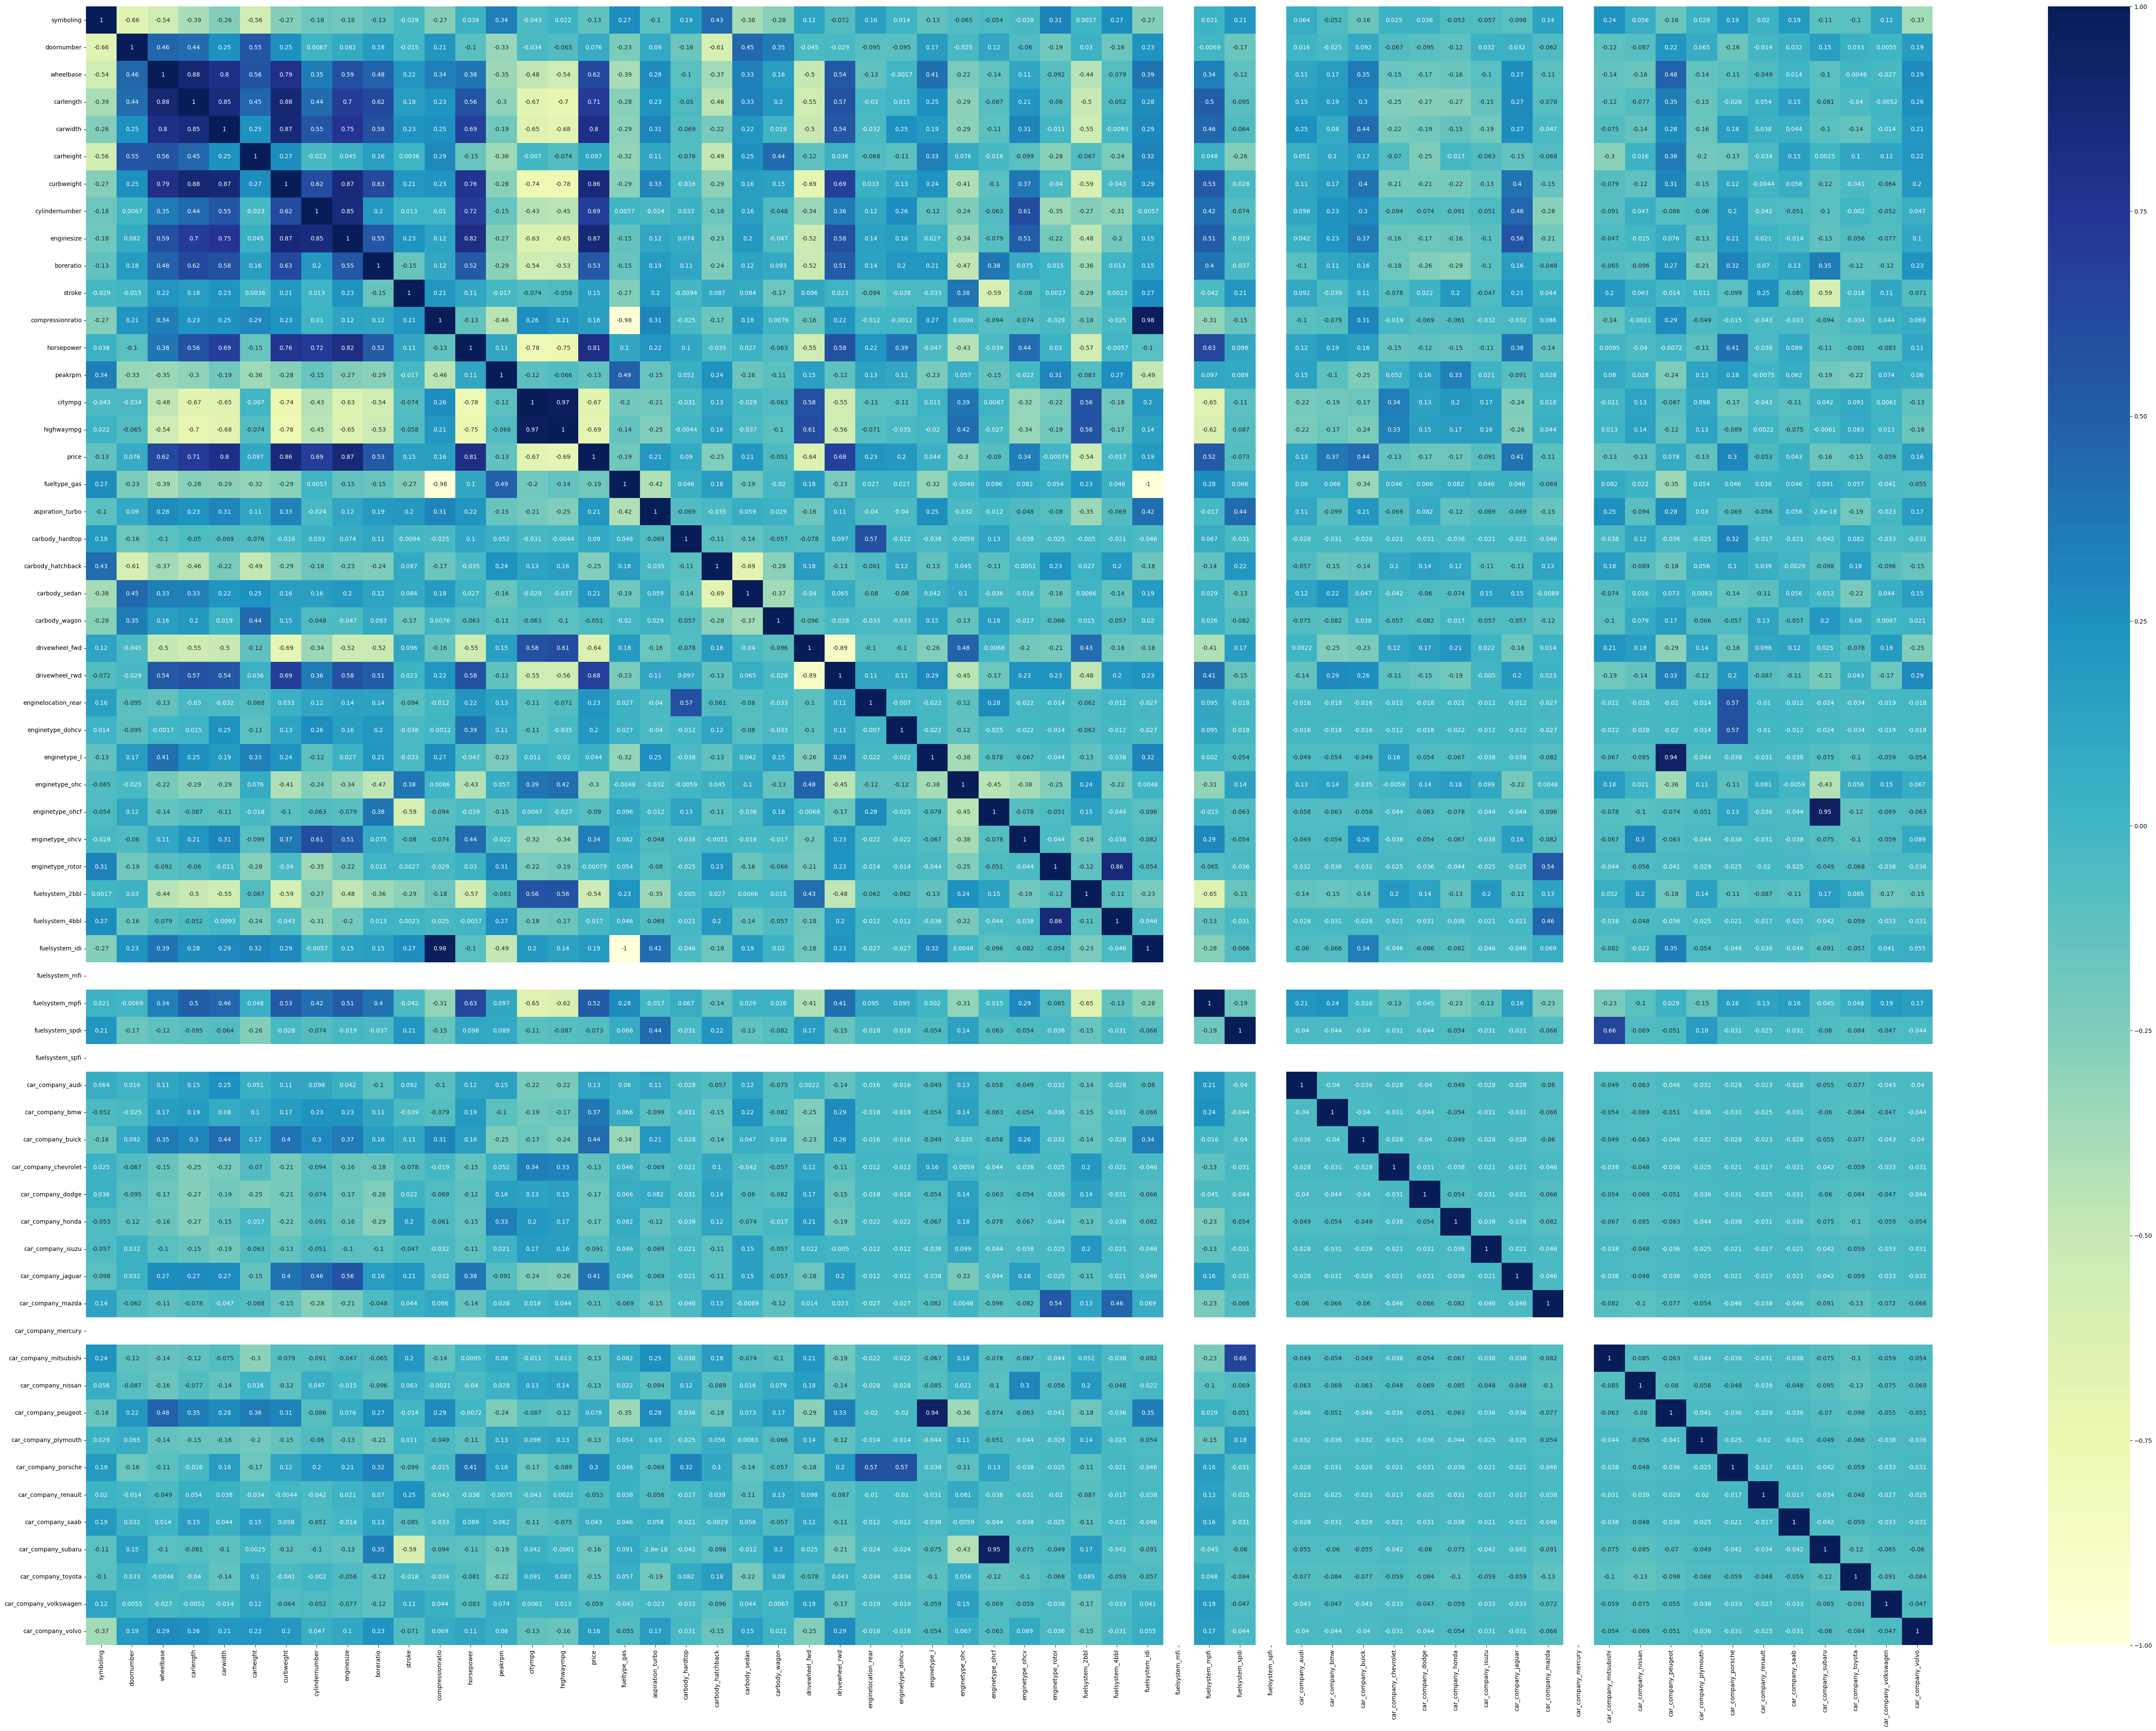

In [167]:
# plotting a heatmap

plt.figure(figsize = (70,50))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

In [42]:
# Split the train dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

### Building the first model with all the features

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
# Print the coefficients and intercept
print(lm.coef_)

[-7.98061909e-03  8.89207248e-03  2.26046464e-01 -1.27285824e-01
  2.50509847e-01 -1.69974358e-01  2.77656489e-01 -5.37853590e-01
  1.39238133e+00 -3.29409830e-01 -1.48977954e-01 -4.05337957e-01
 -1.67082332e-01  2.07565817e-01  7.07160972e-02  9.10007164e-02
 -1.53444543e-01  8.43722075e-02 -1.22163541e-01 -1.36207755e-01
 -1.14600819e-01 -9.54732437e-02 -1.35583013e-02  9.82743262e-03
  2.11716061e-01  1.94003354e-01  2.13788107e-01  6.08133071e-02
  1.31204241e-01  1.74553700e-03  2.40821735e-01  2.57817676e-02
 -6.56434960e-02  1.53444543e-01  1.94289029e-16 -8.60352874e-03
 -1.25855743e-02 -1.45716772e-16 -2.75823022e-02  2.18569516e-01
  2.41598064e-02 -1.27046673e-01 -1.54448628e-01 -1.07796075e-01
 -6.58983650e-02 -5.33411824e-02 -3.39053061e-02 -2.22044605e-16
 -1.73914750e-01 -5.34302272e-02 -2.86555591e-01 -1.53340006e-01
  1.70819065e-01 -7.12170891e-02  1.51585766e-01 -8.05118194e-02
 -3.81752281e-02 -3.79631711e-02  4.00905469e-03]


In [45]:
print(lm.intercept_)

0.26981896617317563


- Compute the VIF 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\simra\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\simra\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features      VIF
28         enginetype_ohcf      inf
55      car_company_subaru      inf
24     enginelocation_rear      inf
16            fueltype_gas  1101.96
33          fuelsystem_idi   333.94
8               enginesize   234.03
11        compressionratio   230.50
7           cylindernumber    93.03
35         fuelsystem_mpfi    66.24
12              horsepower    57.52
14                 citympg    55.40
6               curbweight    52.75
31         fuelsystem_2bbl    50.62
15              highwaympg    47.81
50     car_company_peugeot    39.64
9                boreratio    38.68
20           carbody_sedan    36.42
19       carbody_hatchback    29.01
3                carlength    28.87
2                wheelbase    26.11
4                 carwidth    24.57
43       car_company_honda    24.47
56      car_company_toyota    23.58
21           carbody_wagon    19.49
26            enginetype_l    19.21
23          drivewheel_rwd    18.91
49      car_company_nissan    18.71
46       car_company_mazda    18.09
48  car_company_mitsubishi    15.93
27          enginetype_ohc    14.11
58       car_company_volvo    13.66
40       car_company_buick    13.03
30        enginetype_rotor    12.53
36         fuelsystem_spdi    12.43
39         car_company_bmw    12.12
10                  stroke    12.09
38        car_company_audi    11.30
57  car_company_volkswagen    10.51
42       car_company_dodge    10.32
22          drivewheel_fwd    10.31
52     car_company_porsche     9.87
32         fuelsystem_4bbl     9.37
45      car_company_jaguar     9.21
17        aspiration_turbo     9.05
5                carheight     8.98
51    car_company_plymouth     6.88
13                 peakrpm     6.86
41   car_company_chevrolet     6.76
54        car_company_saab     6.75
25        enginetype_dohcv     6.31
29         enginetype_ohcv     6.03
44       car_company_isuzu     5.93
0                symboling     5.59
53     car_company_renault     5.37
18         carbody_hardtop     4.60
1               doornumber     4.04
34          fuelsystem_mfi      NaN
37         fuelsystem_spfi      NaN
47     car_company_mercury      NaN

#### Model Building Using RFE

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [50]:
rfe1 = RFE (lm, n_features_to_select =15)       
rfe1 = rfe1.fit(X_train, y_train)

In [53]:
col = X_train.columns[rfe1.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'car_company_bmw',
       'car_company_peugeot', 'car_company_porsche'],
      dtype='object')

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [54]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  carlength  carwidth  curbweight  cylindernumber  enginesize  \
122    1.0   0.426016  0.291667    0.272692             0.2    0.139623   
125    1.0   0.452033  0.666667    0.500388             0.2    0.339623   
166    1.0   0.448780  0.308333    0.314973             0.2    0.139623   
1      1.0   0.450407  0.316667    0.411171             0.2    0.260377   
199    1.0   0.775610  0.575000    0.647401             0.2    0.260377   

     boreratio    stroke  compressionratio   peakrpm  fueltype_gas  \
122   0.230159  0.525253           0.15000  0.551020             1   
125   1.000000  0.464646           0.15625  0.551020             1   
166   0.444444  0.449495           0.15000  1.000000             1   
1     0.626984  0.247475           0.12500  0.346939             1   
199   0.746032  0.484848           0.03125  0.387755             1   

     enginelocation_rear  enginetype_l  car_company_bmw  car_company_peugeot  \
122                    0             0                0                    0   
125                    0             0                0                    0   
166                    0             0                0                    0   
1                      0             0                0                    0   
199                    0             0                0                    0   

     car_company_porsche  
122                    0  
125                    1  
166                    0  
1                      0  
199                    0

In [55]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.29e-68
Time:                        10:44:25   Log-Likelihood:                 214.16
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     127   BIC:                            -348.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2080    

In [56]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                 const  1184.43
10         fueltype_gas    59.33
8      compressionratio    51.66
5            enginesize    39.32
4        cylindernumber    17.99
3            curbweight    15.92
14  car_company_peugeot    10.16
12         enginetype_l     9.23
1             carlength     8.31
6             boreratio     7.50
2              carwidth     6.84
7                stroke     3.84
15  car_company_porsche     2.75
11  enginelocation_rear     1.99
9               peakrpm     1.83
13      car_company_bmw     1.18

Notice that there are a few variables which have an infinite VIF. These variables aren't of use. Let's try and build a model with 10 features this time using RFE and see what we get.

In [60]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe2 = RFE (lm, n_features_to_select =10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [61]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [62]:
# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           6.56e-66
Time:                        10:44:50   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1400    

Note that the adjusted R-squared value hasn't dropped much practically. It has gone from `0.912` to `0.901`. So 10 variables seems to be a good number to start with.

In [63]:
# Again VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  138.92
5            enginesize   36.60
4        cylindernumber   17.69
3            curbweight   12.82
1             carlength    7.36
6             boreratio    7.12
2              carwidth    6.41
7                stroke    3.34
10  car_company_porsche    2.50
8   enginelocation_rear    1.87
9       car_company_bmw    1.15

There are still some variables that need to be dropped. 1st drop car_company_subaru.


In [66]:
X_train_rfe2.drop('car_company_subaru', axis = 1, inplace = True)

KeyError: "['car_company_subaru'] not found in axis"

In [67]:
# Refitting with 9 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           6.56e-66
Time:                        10:47:45   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1400    

In [68]:
#  VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  138.92
5            enginesize   36.60
4        cylindernumber   17.69
3            curbweight   12.82
1             carlength    7.36
6             boreratio    7.12
2              carwidth    6.41
7                stroke    3.34
10  car_company_porsche    2.50
8   enginelocation_rear    1.87
9       car_company_bmw    1.15

In [ ]:
X_train_rfe2.drop('enginesize',axis = 1,inplace = True)

In [71]:
X_train_rfe2.head()

const  carlength  carwidth  curbweight  cylindernumber  enginesize  \
122    1.0   0.426016  0.291667    0.272692             0.2    0.139623   
125    1.0   0.452033  0.666667    0.500388             0.2    0.339623   
166    1.0   0.448780  0.308333    0.314973             0.2    0.139623   
1      1.0   0.450407  0.316667    0.411171             0.2    0.260377   
199    1.0   0.775610  0.575000    0.647401             0.2    0.260377   

     boreratio    stroke  enginelocation_rear  car_company_bmw  \
122   0.230159  0.525253                    0                0   
125   1.000000  0.464646                    0                0   
166   0.444444  0.449495                    0                0   
1     0.626984  0.247475                    0                0   
199   0.746032  0.484848                    0                0   

     car_company_porsche  
122                    0  
125                    1  
166                    0  
1                      0  
199                    0

In [ ]:
X_train_rfe2.drop('cylindernumber',axis = 1,inplace = True)

In [90]:
# Refitting with 8 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     136.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.73e-60
Time:                        10:58:58   Log-Likelihood:                 175.07
No. Observations:                 143   AIC:                            -332.1
Df Residuals:                     134   BIC:                            -305.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1134    

In [91]:
# VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                const  24.99
1            carlength   6.74
3           curbweight   6.47
2             carwidth   6.07
4            boreratio   2.32
8  car_company_porsche   2.22
6  enginelocation_rear   1.67
5               stroke   1.25
7      car_company_bmw   1.08

In [94]:
X_train_rfe2.drop('curbweight',axis = 1,inplace = True)

In [95]:
# Refitting with
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model 
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     77.88
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.75e-44
Time:                        11:00:29   Log-Likelihood:                 132.57
No. Observations:                 143   AIC:                            -249.1
Df Residuals:                     135   BIC:                            -225.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2292    

In [96]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                const  21.73
1            carlength   5.52
2             carwidth   4.85
3            boreratio   2.25
7  car_company_porsche   2.22
5  enginelocation_rear   1.65
4               stroke   1.23
6      car_company_bmw   1.07

In [97]:


X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model 
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     77.88
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.75e-44
Time:                        11:00:31   Log-Likelihood:                 132.57
No. Observations:                 143   AIC:                            -249.1
Df Residuals:                     135   BIC:                            -225.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2292    

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                const  21.73
1            carlength   5.52
2             carwidth   4.85
3            boreratio   2.25
7  car_company_porsche   2.22
5  enginelocation_rear   1.65
4               stroke   1.23
6      car_company_bmw   1.07

All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.91` with **15 variables** to just `0.89` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [99]:
y_train_price = lm2.predict(X_train_rfe2)

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

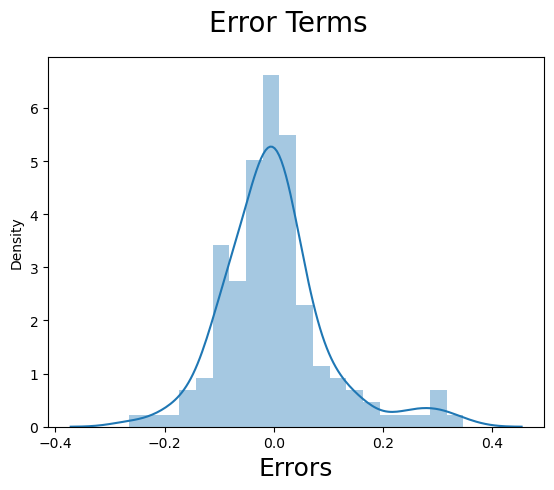

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [101]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [117]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [119]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                62 non-null     float64
 1   carlength            62 non-null     float64
 2   carwidth             62 non-null     float64
 3   curbweight           62 non-null     float64
 4   cylindernumber       62 non-null     float64
 5   enginesize           62 non-null     float64
 6   boreratio            62 non-null     float64
 7   stroke               62 non-null     float64
 8   enginelocation_rear  62 non-null     uint8  
 9   car_company_bmw      62 non-null     uint8  
 10  car_company_porsche  62 non-null     uint8  
dtypes: float64(8), uint8(3)
memory usage: 4.5 KB


In [122]:
X_train_rfe2.drop('boreratio',axis = 1,inplace = True)

In [124]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model 
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     91.52
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.76e-45
Time:                        11:14:23   Log-Likelihood:                 132.56
No. Observations:                 143   AIC:                            -251.1
Df Residuals:                     136   BIC:                            -230.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2275    

In [125]:
X_train_rfe2.drop('stroke',axis = 1,inplace = True)

In [126]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model 
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.61e-46
Time:                        11:14:38   Log-Likelihood:                 132.51
No. Observations:                 143   AIC:                            -253.0
Df Residuals:                     137   BIC:                            -235.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2200    

Thus, for the model with 6 variables, the r-squared on training and test data is about 80%. The adjusted r-squared on the train set is about is about 79%.